# Data Engineering

## Creation of base dataset


In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
sys.path.append(r"../data/")
import scrape_data

In [2]:
try: 
    df = pd.read_csv(r'..\data\district_data\adilabad.csv')
except FileNotFoundError as e:
    scrape_data.create_datasets()
    df = pd.read_csv(r'..\data\district_data\adilabad.csv')

In [3]:
df.date = pd.to_datetime(df.date, format=r"%Y%m%d")
df['month'] = df.date.dt.month
df

,date,T2M,RH2M,WS2M,WD2M,ALLSKY_KT,GWETTOP,EVLAND,PS,PRECIPITATIONCAL,MEI,PC1,PC2,amplitude,month
0,2015-01-01,23.55,65.12,1.75,130.69,0.38,0.37,9.94,97.12,24.31,0.23,-1.40015,0.96675,1.70148,1
1,2015-01-02,23.34,71.88,1.88,141.00,0.43,0.54,17.78,97.40,1.00,0.23,-1.74316,1.00767,2.01346,1
2,2015-01-03,20.17,88.62,1.87,154.25,0.16,0.66,14.37,97.60,3.82,0.23,-2.03657,1.02990,2.28217,1
3,2015-01-04,20.72,74.56,2.25,73.00,0.34,0.56,18.38,97.74,0.00,0.23,-2.26712,1.02739,2.48905,1
4,2015-01-05,18.68,59.81,2.09,18.50,0.66,0.53,16.19,97.75,0.00,0.23,-2.42346,0.99678,2.62044,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2021-12-27,21.01,73.19,0.92,113.75,0.40,0.59,17.79,97.73,0.00,-1.21,-0.70756,0.47105,0.85002,12
2553,2021-12-28,21.53,79.25,1.87,172.38,0.45,0.60,20.85,97.62,3.24,-1.21,-0.65159,0.47253,0.80489,12
2554,2021-12-29,20.45,83.62,1.76,184.44,0.38,0.62,18.86,97.65,0.00,-1.21,-0.55501,0.44320,0.71026,12
2555,2021-12-30,18.71,83.50,2.71,53.75,0.44,0.61,15.57,97.98,0.00,-1.21,-0.42160,0.38602,0.57163,12


## Cleaning

In [4]:
df.replace(-999.0,np.nan, inplace=True)
for i in df.columns.drop('date'):
    df[i] = df[i].interpolate(method='linear')
df

,date,T2M,RH2M,WS2M,WD2M,ALLSKY_KT,GWETTOP,EVLAND,PS,PRECIPITATIONCAL,MEI,PC1,PC2,amplitude,month
0,2015-01-01,23.55,65.12,1.75,130.69,0.38,0.37,9.94,97.12,24.31,0.23,-1.40015,0.96675,1.70148,1
1,2015-01-02,23.34,71.88,1.88,141.00,0.43,0.54,17.78,97.40,1.00,0.23,-1.74316,1.00767,2.01346,1
2,2015-01-03,20.17,88.62,1.87,154.25,0.16,0.66,14.37,97.60,3.82,0.23,-2.03657,1.02990,2.28217,1
3,2015-01-04,20.72,74.56,2.25,73.00,0.34,0.56,18.38,97.74,0.00,0.23,-2.26712,1.02739,2.48905,1
4,2015-01-05,18.68,59.81,2.09,18.50,0.66,0.53,16.19,97.75,0.00,0.23,-2.42346,0.99678,2.62044,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2021-12-27,21.01,73.19,0.92,113.75,0.40,0.59,17.79,97.73,0.00,-1.21,-0.70756,0.47105,0.85002,12
2553,2021-12-28,21.53,79.25,1.87,172.38,0.45,0.60,20.85,97.62,3.24,-1.21,-0.65159,0.47253,0.80489,12
2554,2021-12-29,20.45,83.62,1.76,184.44,0.38,0.62,18.86,97.65,0.00,-1.21,-0.55501,0.44320,0.71026,12
2555,2021-12-30,18.71,83.50,2.71,53.75,0.44,0.61,15.57,97.98,0.00,-1.21,-0.42160,0.38602,0.57163,12


## Scaling and Normalization

Standardization: Using the StandardScaler we will scale the following:
 - Temperature (T2M)
 - Wind Speed (WS2M)
 - Clearness Index (ALL_SKY_KT)
 - Soil Surface Moisture (GWETTOP)
 - Evapotranspiration Rate (EVLAND)
 - Surface Pressure (PS)

In [5]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaling_cols = ['T2M',
                        'WS2M',
                        'ALLSKY_KT',
                        'GWETTOP',
                        'EVLAND',
                        'PS']

df[standard_scaling_cols] = standard_scaler.fit_transform(df[standard_scaling_cols])
df


,date,T2M,RH2M,WS2M,WD2M,ALLSKY_KT,GWETTOP,EVLAND,PS,PRECIPITATIONCAL,MEI,PC1,PC2,amplitude,month
0,2015-01-01,-0.685396,65.12,-0.449193,130.69,-1.208373,-0.487223,-0.675257,0.112521,2.249497,0.23,-1.40015,0.96675,1.70148,1
1,2015-01-02,-0.727393,71.88,-0.311153,141.00,-0.840644,0.160753,-0.321738,0.701933,-0.214321,0.23,-1.74316,1.00767,2.01346,1
2,2015-01-03,-1.361347,88.62,-0.321772,154.25,-2.826383,0.618148,-0.475501,1.122941,0.083747,0.23,-2.03657,1.02990,2.28217,1
3,2015-01-04,-1.251355,74.56,0.081729,73.00,-1.502557,0.236986,-0.294683,1.417647,-0.320019,0.23,-2.26712,1.02739,2.48905,1
4,2015-01-05,-1.659325,59.81,-0.088166,18.50,0.850912,0.122637,-0.393434,1.438698,-0.320019,0.23,-2.42346,0.99678,2.62044,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2021-12-27,-1.193359,73.19,-1.330524,113.75,-1.061281,0.351335,-0.321287,1.396597,-0.320019,-1.21,-0.70756,0.47105,0.85002,12
2553,2021-12-28,-1.089366,79.25,-0.321772,172.38,-0.693552,0.389451,-0.183306,1.165042,0.022443,-1.21,-0.65159,0.47253,0.80489,12
2554,2021-12-29,-1.305351,83.62,-0.438575,184.44,-1.208373,0.465683,-0.273039,1.228193,-0.320019,-1.21,-0.55501,0.44320,0.71026,12
2555,2021-12-30,-1.653326,83.50,0.570178,53.75,-0.767098,0.427567,-0.421391,1.922857,-0.320019,-1.21,-0.42160,0.38602,0.57163,12


In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
df['PRECIPITATIONCAL'] = minmaxscaler.fit_transform(df['PRECIPITATIONCAL'])

Cyclic Encoding:
- Apply Cyclic encoding to the WD2M parameter
- Drop WD2M

In [6]:
df['WD2M_sin'] = np.sin(np.deg2rad(df.WD2M))
df['WD2M_cos'] = np.cos(np.deg2rad(df.WD2M))
df.drop(columns='WD2M', inplace=True)

MinMax Scaling:
Scale Features using that have a given range:
- Relative Humidity scaled down by 100 (since it is a percentage)
- Amplitude to be scaled down by 3 (0-3) is range of Amplitude

In [7]:
df.amplitude = df.amplitude/3
df.RH2M = df.RH2M/100
df

,date,T2M,RH2M,WS2M,ALLSKY_KT,GWETTOP,EVLAND,PS,PRECIPITATIONCAL,MEI,PC1,PC2,amplitude,month,WD2M_sin,WD2M_cos
0,2015-01-01,-0.685396,0.6512,-0.449193,-1.208373,-0.487223,-0.675257,0.112521,2.249497,0.23,-1.40015,0.96675,0.567160,1,0.758248,-0.651966
1,2015-01-02,-0.727393,0.7188,-0.311153,-0.840644,0.160753,-0.321738,0.701933,-0.214321,0.23,-1.74316,1.00767,0.671153,1,0.629320,-0.777146
2,2015-01-03,-1.361347,0.8862,-0.321772,-2.826383,0.618148,-0.475501,1.122941,0.083747,0.23,-2.03657,1.02990,0.760723,1,0.434445,-0.900698
3,2015-01-04,-1.251355,0.7456,0.081729,-1.502557,0.236986,-0.294683,1.417647,-0.320019,0.23,-2.26712,1.02739,0.829683,1,0.956305,0.292372
4,2015-01-05,-1.659325,0.5981,-0.088166,0.850912,0.122637,-0.393434,1.438698,-0.320019,0.23,-2.42346,0.99678,0.873480,1,0.317305,0.948324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2021-12-27,-1.193359,0.7319,-1.330524,-1.061281,0.351335,-0.321287,1.396597,-0.320019,-1.21,-0.70756,0.47105,0.283340,12,0.915311,-0.402747
2553,2021-12-28,-1.089366,0.7925,-0.321772,-0.693552,0.389451,-0.183306,1.165042,0.022443,-1.21,-0.65159,0.47253,0.268297,12,0.132602,-0.991169
2554,2021-12-29,-1.305351,0.8362,-0.438575,-1.208373,0.465683,-0.273039,1.228193,-0.320019,-1.21,-0.55501,0.44320,0.236753,12,-0.077415,-0.996999
2555,2021-12-30,-1.653326,0.8350,0.570178,-0.767098,0.427567,-0.421391,1.922857,-0.320019,-1.21,-0.42160,0.38602,0.190543,12,0.806445,0.591310


## EDA

In [8]:
df

,date,T2M,RH2M,WS2M,ALLSKY_KT,GWETTOP,EVLAND,PS,PRECIPITATIONCAL,MEI,PC1,PC2,amplitude,month,WD2M_sin,WD2M_cos
0,2015-01-01,-0.685396,0.6512,-0.449193,-1.208373,-0.487223,-0.675257,0.112521,2.249497,0.23,-1.40015,0.96675,0.567160,1,0.758248,-0.651966
1,2015-01-02,-0.727393,0.7188,-0.311153,-0.840644,0.160753,-0.321738,0.701933,-0.214321,0.23,-1.74316,1.00767,0.671153,1,0.629320,-0.777146
2,2015-01-03,-1.361347,0.8862,-0.321772,-2.826383,0.618148,-0.475501,1.122941,0.083747,0.23,-2.03657,1.02990,0.760723,1,0.434445,-0.900698
3,2015-01-04,-1.251355,0.7456,0.081729,-1.502557,0.236986,-0.294683,1.417647,-0.320019,0.23,-2.26712,1.02739,0.829683,1,0.956305,0.292372
4,2015-01-05,-1.659325,0.5981,-0.088166,0.850912,0.122637,-0.393434,1.438698,-0.320019,0.23,-2.42346,0.99678,0.873480,1,0.317305,0.948324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2021-12-27,-1.193359,0.7319,-1.330524,-1.061281,0.351335,-0.321287,1.396597,-0.320019,-1.21,-0.70756,0.47105,0.283340,12,0.915311,-0.402747
2553,2021-12-28,-1.089366,0.7925,-0.321772,-0.693552,0.389451,-0.183306,1.165042,0.022443,-1.21,-0.65159,0.47253,0.268297,12,0.132602,-0.991169
2554,2021-12-29,-1.305351,0.8362,-0.438575,-1.208373,0.465683,-0.273039,1.228193,-0.320019,-1.21,-0.55501,0.44320,0.236753,12,-0.077415,-0.996999
2555,2021-12-30,-1.653326,0.8350,0.570178,-0.767098,0.427567,-0.421391,1.922857,-0.320019,-1.21,-0.42160,0.38602,0.190543,12,0.806445,0.591310


<Axes: >

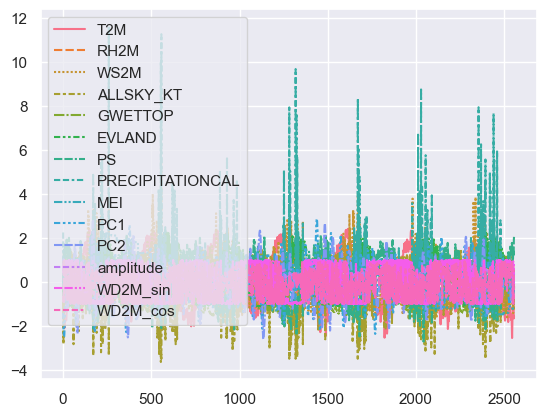

In [9]:
sns.set_theme(style="darkgrid")
sns.lineplot(df.drop(columns='month'))

## Create test Dataset

In [9]:
import json
import requests
import numpy as np
url =  "https://power.larc.nasa.gov/api/temporal/daily/point"

params = {
    "parameters":'T2M',
    "start": "20220101", #Get data from 2015 because we use standard scaler to scale, and test data is from 2015 to 2021
    "end": "20221231",
    "community": "RE",
    "latitude": str(19.67),
    "longitude": str(78.53),
    "user":"DAVEDownload",
    "format":"JSON",
    
}

response = requests.get(url, params=params)
json_data = json.loads(response.text)
json_data['properties']['parameter']
test_df = pd.DataFrame(json_data['properties']['parameter'])
# test_df.replace(-999.0, np.nan, inplace=True)
test_df['date'] = test_df.index
test_df['date'] = pd.to_datetime(test_df.date, format=r"%Y%m%d")
test_df.replace(-999.0,np.nan, inplace=True)
test_df['T2M'] = test_df['T2M'].interpolate(method='linear')
test_df.T2M.astype(np.float64)
# test_ss = StandardScaler()
# test_df['T2M'] = test_ss.fit_transform(test_df['T2M'].to_numpy().reshape(-1,1))
# test_df


test_df['month'] = test_df.date.dt.month
test_df

,T2M,date,month
20220101,19.38,2022-01-01,1
20220102,19.55,2022-01-02,1
20220103,18.68,2022-01-03,1
20220104,18.99,2022-01-04,1
20220105,20.12,2022-01-05,1
...,...,...,...
20221227,23.64,2022-12-27,12
20221228,22.94,2022-12-28,12
20221229,20.29,2022-12-29,12
20221230,21.95,2022-12-30,12


# Testing Models (DARTS)

## Create Timesereies

In [10]:
import pandas as pd
from darts import TimeSeries

series = TimeSeries.from_dataframe(df, "date", df.columns.drop('date'))

target = series['T2M']
train_series = series
test_series = TimeSeries.from_dataframe(test_df, "date", ["T2M",'month'])


past_covariates = series[['RH2M',
                          'WS2M',
                          'ALLSKY_KT',
                          'GWETTOP',
                          'EVLAND',
                          'PS',
                          'PRECIPITATIONCAL',
                          'MEI',
                          'PC1',
                          'PC2',
                          'amplitude',
                          'month',
                          'WD2M_sin',
                          'WD2M_cos']]

future_covariates = series['month'].append(test_series['month'])



## NLinearModel


In [12]:
from darts.models import  NLinearModel
import torch
Heatwave_NLinearModel =  NLinearModel(
                     model_name='Heatwave_NLinear',
                     loss_fn=torch.nn.HuberLoss(),
                     input_chunk_length=720,
                     output_chunk_length=365,
                     batch_size=32,
                     n_epochs=100,
                     add_encoders={
                        'cyclic': {'future': ['month'], 'past':['month']},
                        },
                     force_reset=True,
                     pl_trainer_kwargs={
                        "accelerator": "gpu",
                        "devices": [0]
                      },
                      log_tensorboard=True
                    )

## TCN Model: Temporal Convolutional Network

In [16]:
from darts.models.forecasting.tcn_model import TCNModel
import torch
Heatwave_TCNModel = TCNModel(
                     model_name='TCN_Heatwave',
                     loss_fn=torch.nn.HuberLoss(),
                     input_chunk_length=1095,
                     output_chunk_length=365,
                     batch_size=256,
                     n_epochs=1000,
                     add_encoders={
                        'cyclic': {'past':['month']},
                        },
                     force_reset=True,
                     pl_trainer_kwargs={
                        "accelerator": "gpu",
                        "devices": [0]
                      },
                      log_tensorboard=True
                    )
# model.fit(train_series)


## TFT Model: Temporal Fusion Transformer

In [20]:
from darts.models.forecasting.tft_model import TFTModel
import torch
import torchmetrics

torch.cuda.empty_cache()
Heatwave_TFTModel = TFTModel(
                     model_name='Heatwave_TFT2',
                     input_chunk_length=365,
                     output_chunk_length=365,
                     batch_size=32,
                     # torch_metrics=regression_metrics,
                     full_attention=True,
                     feed_forward='ReGLU',
                     n_epochs=50,
                     add_encoders={
                        'cyclic': {'future': ['month'], 'past':['month']},
                        },
                     force_reset=True,
                     pl_trainer_kwargs={
                        "accelerator": "gpu",
                        "devices": [0]
                      },
                      log_tensorboard=True
                    )
# model.fit(train_series, verbose=True)


## Fit, Predict and Metrics

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def get_metrics(actual: TimeSeries, forecast: TimeSeries):
    
    actual = test_series['T2M'].values()
    forecast = forecast['T2M'].values()

    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, forecast)

    print("Mean Absolute Error (MAE): {:.4f}".format(mae))
    print("Mean Squared Error (MSE): {:.4f}".format(mse))
    print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))
    print("R-squared (R2): {:.4f}".format(r2))

In [24]:
import matplotlib.pyplot as plt
def fit_predict_plot_heatwave(model, predicition_horizon=365, plot_previous_years=False, is_prefitted=False):
    if not is_prefitted:
        model.fit(train_series, 
                    verbose=True,
                    past_covariates = past_covariates,
                    future_covariates = future_covariates 
                    )
    
    forecast = model.predict(  predicition_horizon,
                                past_covariates = past_covariates,
                                future_covariates = future_covariates
                                )
    
    #Inverse scale forecast values
    forecast = forecast['T2M'] * standard_scaler.scale_[0] + standard_scaler.mean_[0]
    # print(forecast)
    plt.figure(figsize=(20,10))
    if plot_previous_years:
        series[['T2M']].plot()
    test_series['T2M'].plot()
    forecast['T2M'].plot(label="forecast")


    plt.savefig(f'darts_logs/{model.model_name}/{model.model_name}_plot.png')
    plt.legend()
    plt.show()
    

    get_metrics(actual=test_series, forecast=forecast)
    
    
    

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | HuberLoss         | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCarloDropout | 0     
4 | res_blocks    | ModuleList        | 1.1 K 
----------------------------------------------------
1.1 K     Trainable params
0         Non-trainable params
1.1 K     Total params
0.009     Total estimated model params size (MB)
c:\Users\hitan\OneDrive\Desktop\MiniProjects\HeatWavePrediction\.venv\lib\site-packages\pytorch_lightning\trainer\trainer.py:1892: PossibleUserWarning: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=1000` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

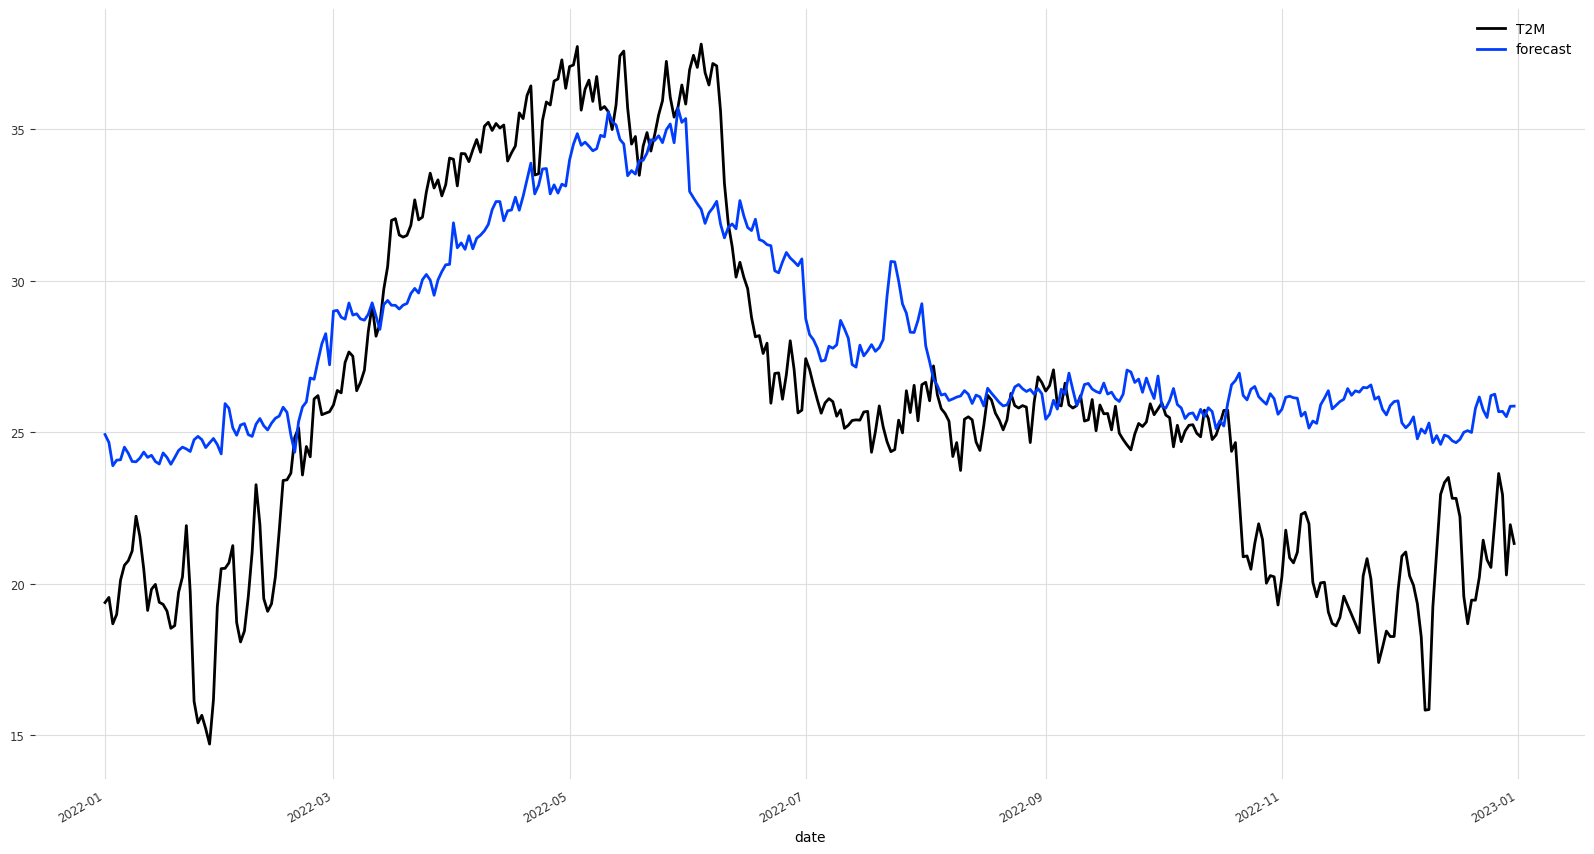

Mean Absolute Error (MAE): 2.9905
Mean Squared Error (MSE): 13.8693
Root Mean Squared Error (RMSE): 3.7242
R-squared (R2): 0.5882


In [25]:
fit_predict_plot_heatwave(Heatwave_TCNModel)

In [1]:
fit_predict_plot_heatwave(Heatwave_TFTModel)

NameError: name 'fit_predict_plot_heatwave' is not defined

In [47]:
Heatwave_TCNModel.save('..\models\darts_logs\TCN_Heatwave\TCN_Heatwave.pt')

In [15]:
Heatwave_TFTModel.save('..\models\darts_logs\Heatwave_TFT\TFT_Heatwave.pt')